In [1]:
#importing required python libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

df = pd.read_csv("./data/crime.csv", encoding = "ISO-8859-1")
df.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,NaN,19-10-2018 21:39,2018,10,Friday,21,Part One,E SECOND ST,42.337458,-71.027225,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,NaN,19-10-2018 20:52,2018,10,Friday,20,Part Three,PRENTISS ST,42.333805,-71.093776,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,NaN,19-10-2018 20:21,2018,10,Friday,20,Part Three,MONADNOCK ST,42.316339,-71.068800,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,NaN,19-10-2018 16:50,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,NaN,19-10-2018 16:50,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"


In [2]:
#cleaning the dataset and handling missing data


def clean(value):
    if value == "Y":
        return 1
    else:
        return 0
    
#since incident_number here is our primary key we need to check if any value is null or NaN
df[df["INCIDENT_NUMBER"].isnull()]

#since shooting is considered to be violent crime in UCR_PART codes and comes under part 1 we will save all the missing values
#in shooting column as 0 which signifies that shooting did not took place and 1 elsewhere which signifies shooting did take place.

df["SHOOTING"].fillna(0, inplace = True)
df["SHOOTING"].replace("Y", 1, inplace = True)
#we need to drop the rows which contain missing data
df.dropna(inplace = True)

#here checking for duplicates is not a good option because our data may contain duplicates with same incident_number as more than
#one type of incident could take place at same crime scene
df.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,0,19-10-2018 21:39,2018,10,Friday,21,Part One,E SECOND ST,42.337458,-71.027225,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,0,19-10-2018 20:52,2018,10,Friday,20,Part Three,PRENTISS ST,42.333805,-71.093776,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,0,19-10-2018 20:21,2018,10,Friday,20,Part Three,MONADNOCK ST,42.316339,-71.068800,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,19-10-2018 16:50,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,19-10-2018 16:50,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"


In [3]:
#checking the data type of all the columns - if they are consistent with required data types
print(df.dtypes)


INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                 int64
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object


In [4]:
#here we can clearly see that our date columns i.e. OCCURRED_ON_DATE is of type object but has to be of type datetime
#converting it into datetime we have

df["OCCURRED_ON_DATE"] = pd.to_datetime(df.OCCURRED_ON_DATE, infer_datetime_format = True)
print(df.dtypes)
df.head()

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                        int64
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,0,2018-10-19 21:39:00,2018,10,Friday,21,Part One,E SECOND ST,42.337458,-71.027225,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,0,2018-10-19 20:52:00,2018,10,Friday,20,Part Three,PRENTISS ST,42.333805,-71.093776,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,0,2018-10-19 20:21:00,2018,10,Friday,20,Part Three,MONADNOCK ST,42.316339,-71.068800,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,2018-10-19 16:50:00,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,2018-10-19 16:50:00,2018,10,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"


In [5]:
#applying further transformation on our data we will replace day names with their integer counterpart. This will
#improve performance and space consumed by dataframe in the memory

weekdays = {"Monday" : 1, "Tuesday" : 2, "Wednesday" : 3, "Thursday" : 4, "Friday" : 5, "Saturday" : 6, "Sunday" : 0}
df.replace(weekdays, inplace=True)

#we will perform same thing with UCR_PART codes

ucr_part = {"Part One" : 1, "Part Two" : 2, "Part Three" : 3}
df.replace(ucr_part, inplace = True)



In [6]:
df.drop(["Lat", "Long"], axis = 1, inplace = True)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,0,2018-10-19 21:39:00,2018,10,5,21,1,E SECOND ST,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,0,2018-10-19 20:52:00,2018,10,5,20,3,PRENTISS ST,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,0,2018-10-19 20:21:00,2018,10,5,20,3,MONADNOCK ST,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"


# Cleaned DataSet Columns description

1. INCIDENT_NUMBER: This is a unique id which is assigned to every violation / Crime. Multiple entries in this dataset can contain same values of INCIDENT_NUMBER as more than one charges could be imposed on the culprits.

2. OFFENSE_CODE : OFFENCE_CODE is a unique code assigned to each and every offense. This is used to categorize the offense.

3. OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION : former categorizes each offense into a group and later describes what type of offense took place.

4. DISTRICT: This is a code given to each and every district in BOSTON POLICE DEPARTMENT administration.

5. REPORTING_AREA : This further breaks down the areas in district with a unique code for the area.

6. SHOOTING : This one digit flag signifies whether shooting took place or not. Since shooting comes under violent crime these types of incidents are given more priority.

7. OCCURRED_ON_DATE : This datetime column signifies the time of the incident as reported.

8. UCR_PART = This stands for Uniform Crime Reports codes which are introduced by FBI to determine the severity of crime. PART_1 code is considered to be mild serious, the offense in this category include AUTO_THEFT etc. Part_2 offense code is considered to be very serious which includes homicide, drug possession and sales etc. PART_3 codes are not considered to be much serious and crimes under these codes includes VERBAL DISPUTE etc.

9. LOCATION : This column holds the coordinates of the location where incident took place.

# Performing Data Analysis

YEAR
2015    51267
2016    91521
2017    93143
2018    72747
Name: INCIDENT_NUMBER, dtype: int64


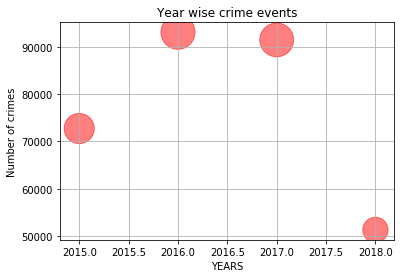

In [95]:
#using various groupby, aggregations we will gather some insights into our criminal reports.

#let's look at some insight about how much crimes are being committed each year from 2015 to 2018. and see if crime rates
#are increased,decreased or stayed the same.

df_year = df["INCIDENT_NUMBER"].groupby(df["YEAR"])
print(df_year.count())

years = list(df["YEAR"].unique())
counts = list(dict(df_year.count()).values())
s = [int(x/80) for x in counts]
plt.scatter(years, counts,s ,c="r", alpha=0.5)
plt.grid(b=True, which="both", axis="both")
plt.xlabel("YEARS")
plt.ylabel("Number of crimes")
plt.title("Year wise crime events")
plot = plt.gcf()
plot.savefig("./insights/year_wise.png")
plt.show()


as we can clearly see in above scatter plot crime rate has decreased in 2018 as compared to other year. The possible causes might be that data for complete 2018 is not avaialble. So in general we can say that number of crimes in boston is increasing every year between 2015-2018


Let's look at year wise insights starting from year 2015 and then to subsquent years

MONTH
6     4064
7     8047
8     8027
9     8056
10    7969
11    7486
12    7618
Name: INCIDENT_NUMBER, dtype: int64


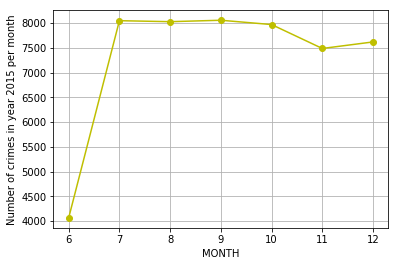

In [9]:
df_2015 = df[df["YEAR"] == 2015]["INCIDENT_NUMBER"].groupby(df["MONTH"])
print(df_2015.count())

month_2015 = list(dict(df_2015.count()).keys())
counts_2015 = dict(df_2015.count()).values()
#s = [int(x/10) for x in counts_2015]
#plt.scatter(month_2015, counts_2015,s ,c="y", alpha=0.5)
plt.plot(month_2015, counts_2015, "yo-")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("MONTH")
plt.ylabel("Number of crimes in year 2015 per month")
plot = plt.gcf()
plot.savefig("./insights/year_2015_month_wise.png")
plt.show()

As we can clearly see in the year 2015, number of crimes are lowest in the month of Aug and then increase sharpy upto novemeber and then again increase in Dec slightly

MONTH
1     7515
2     6804
3     7597
4     7555
5     7960
6     7959
7     7829
8     8065
9     7743
10    7789
11    7274
12    7431
Name: INCIDENT_NUMBER, dtype: int64


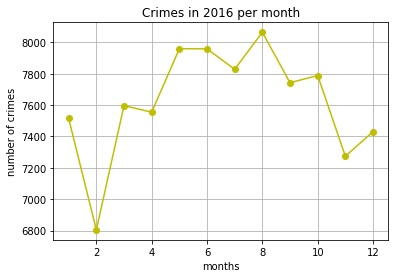

In [10]:
df_2016 = df[df["YEAR"] == 2016]["INCIDENT_NUMBER"].groupby(df["MONTH"])
print(df_2016.count())

month_2016 = list(dict(df_2016.count()).keys())
counts_2016 = list(dict(df_2016.count()).values())

plt.plot(month_2016, counts_2016, "yo-")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("months")
plt.ylabel("number of crimes")
plt.title("Crimes in 2016 per month")
plot = plt.gcf()
plot.savefig("./insights/year_2016_month_wise.png")
plt.show()

MONTH
1     7446
2     6838
3     7519
4     7466
5     8062
6     8319
7     8316
8     8413
9     8273
10    8139
11    7345
12    7007
Name: INCIDENT_NUMBER, dtype: int64


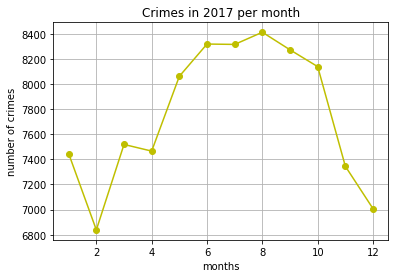

In [11]:
df_2017 = df[df["YEAR"] == 2017]["INCIDENT_NUMBER"].groupby(df["MONTH"])
print(df_2017.count())

month_2017 = list(dict(df_2017.count()).keys())
counts_2017 = list(dict(df_2017.count()).values())

plt.plot(month_2017, counts_2017, "yo-")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("months")
plt.ylabel("number of crimes")
plt.title("Crimes in 2017 per month")
plot = plt.gcf()
plot.savefig("./insights/year_2017_month_wise.png")
plt.show()



MONTH
1     7252
2     6447
3     7188
4     7425
5     8258
6     8215
7     7959
8     8023
9     7602
10    4378
Name: INCIDENT_NUMBER, dtype: int64


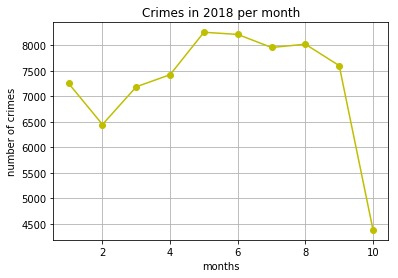

In [12]:
df_2018 = df[df["YEAR"] == 2018]["INCIDENT_NUMBER"].groupby(df["MONTH"])
print(df_2018.count())

month_2018 = list(dict(df_2018.count()).keys())
counts_2018 = list(dict(df_2018.count()).values())

plt.plot(month_2018, counts_2018, "yo-")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("months")
plt.ylabel("number of crimes")
plt.title("Crimes in 2018 per month")
plot = plt.gcf()
plot.savefig("./insights/year_2018_month_wise.png")
plt.show()


As we can clearly see that not much could be concluded from the above plots as crime rate is fluctuating for each month in all the four years. Let's look at another insight

MONTH
1     22213
2     20089
3     22304
4     22446
5     24280
6     28557
7     32151
8     32528
9     31674
10    28275
11    22105
12    22056
Name: INCIDENT_NUMBER, dtype: int64


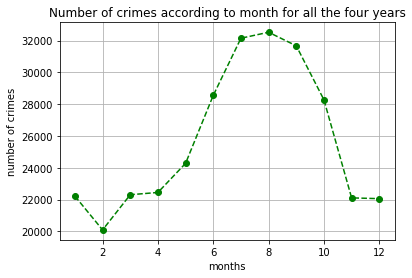

In [18]:
month_wise_all = df["INCIDENT_NUMBER"].groupby(df["MONTH"])
print(month_wise_all.count())

months = list(dict(month_wise_all.count()).keys())
counts = list(dict(month_wise_all.count()).values())

plt.plot(months, counts, "go--")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("months")
plt.ylabel("number of crimes")
plt.title("Number of crimes according to month for all the four years")
plot = plt.gcf()
plot.savefig("./insights/month_wise_all.png")
plt.show()



# On analyzing all the above plots we can conclude that number of crimes tends to decrease in the month of Oct- Nov each year

# # Now we will perform weekly data analysis to gather some more insights

In [19]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,0,2018-10-19 21:39:00,2018,10,5,21,1,E SECOND ST,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,0,2018-10-19 20:52:00,2018,10,5,20,3,PRENTISS ST,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,0,2018-10-19 20:21:00,2018,10,5,20,3,MONADNOCK ST,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"


DAY_OF_WEEK
0    6370
1    7496
2    7601
3    7581
4    7448
5    7701
6    7070
Name: INCIDENT_NUMBER, dtype: int64
DAY_OF_WEEK
0    11705
1    13071
2    13217
3    13275
4    13315
5    13925
6    13013
Name: INCIDENT_NUMBER, dtype: int64
DAY_OF_WEEK
0    12086
1    13079
2    13403
3    13684
4    13630
5    14285
6    12976
Name: INCIDENT_NUMBER, dtype: int64
DAY_OF_WEEK
0     8969
1    10473
2    10609
3    10851
4    10726
5    11063
6    10056
Name: INCIDENT_NUMBER, dtype: int64


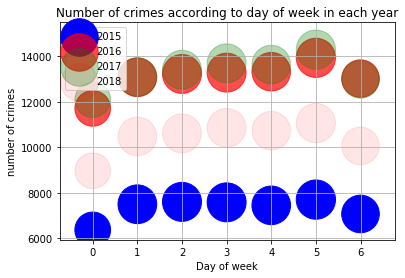

In [70]:
#for year 2015

df_2015 = df[df["YEAR"] == 2015]
df_2015_week = df_2015["INCIDENT_NUMBER"].groupby(df_2015["DAY_OF_WEEK"])
print(df_2015_week.count())
day_2015 = list(dict(df_2015_week.count()).keys())
counts_2015 = list(dict(df_2015_week.count()).values())
s1 = [int(x/5) for x in counts]

#for year 2016

df_2016 = df[df["YEAR"] == 2016]
df_2016_week = df_2016["INCIDENT_NUMBER"].groupby(df_2016["DAY_OF_WEEK"])
print(df_2016_week.count())
day_2016 = list(dict(df_2016_week.count()).keys())
counts_2016 = list(dict(df_2016_week.count()).values())
s2 = [int(x/5) for x in counts]

#for the year 2017

df_2017 = df[df["YEAR"] == 2017]
df_2017_week = df_2017["INCIDENT_NUMBER"].groupby(df_2017["DAY_OF_WEEK"])
print(df_2017_week.count())
day_2017 = list(dict(df_2017_week.count()).keys())
counts_2017 = list(dict(df_2017_week.count()).values())
s3 = [int(x/5) for x in counts]

#for year 2018

df_2018 = df[df["YEAR"] == 2018]
df_2018_week = df_2018["INCIDENT_NUMBER"].groupby(df_2018["DAY_OF_WEEK"])
print(df_2018_week.count())
day_2018 = list(dict(df_2018_week.count()).keys())
counts_2018 = list(dict(df_2018_week.count()).values())
s4 = [int(x/5) for x in counts]

days = list(dict(df_2017_week.count()).keys())

#plt.subplot(4,1,1)
plt.scatter(x = days, y = counts_2015, s=s1, c="b", alpha = 1, label="2015")
plt.grid(b=True, which="both", axis="both")
plt.xlabel("Day of week")
plt.ylabel("number of crimes")
plt.title("Number of crimes according to day of week in each year")

#plt.subplot(4,1,2)
plt.scatter(x = days, y = counts_2016, s=s2, c="r", alpha = 0.7, label="2016")
plt.grid(b=True, which="both", axis="both")
'''plt.xlabel("Day of week")
plt.ylabel("number of crimes")
plt.title("Number of crimes according to day of week in 2016")
'''
#plt.subplot(4,1,3)
plt.scatter(x = days, y = counts_2017, s=s3, c="g", alpha = 0.3, label="2017")
plt.grid(b=True, which="both", axis="both")
'''plt.xlabel("Day of week")
plt.ylabel("number of crimes")
plt.title("Number of crimes according to day of week in 2017")
'''
#plt.subplot(4,1,4)
plt.scatter(x = days, y = counts_2018, s=s4, c="r", alpha = 0.1, label="2018")
plt.grid(b=True, which="both", axis="both")
'''plt.xlabel("Day of week")
plt.ylabel("number of crimes")
plt.title("Number of crimes according to day of week in 2018")
'''
plt.legend(loc="best")
plot = plt.gcf()
plot.savefig("./insights/week_wise_yearly.png")

plt.show()

 As we can see from above plot that in all the four years the least number of crimes happen on sunday and saturday.

In [71]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
0,I182084644,724,Auto Theft,AUTO THEFT,C6,224,0,2018-10-19 21:39:00,2018,10,5,21,1,E SECOND ST,"(42.33745847, -71.02722518)"
1,I182084643,3301,Verbal Disputes,VERBAL DISPUTE,B2,911,0,2018-10-19 20:52:00,2018,10,5,20,3,PRENTISS ST,"(42.33380529, -71.09377598)"
2,I182084641,3115,Investigate Person,INVESTIGATE PERSON,B2,258,0,2018-10-19 20:21:00,2018,10,5,20,3,MONADNOCK ST,"(42.31633855, -71.06879992)"
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"


# Is gun control necessary? ..

Lately we have been hearing in the news that US should regulate guns in the hands of common citizens let see if that's necessary

YEAR
2015    178
2016    267
2017    358
2018    230
Name: INCIDENT_NUMBER, dtype: int64


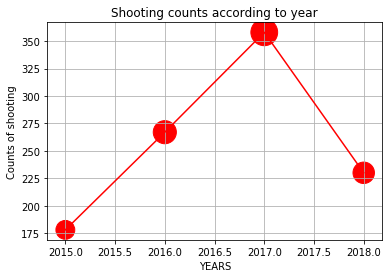

In [91]:
df_shooting = df[df["SHOOTING"] == 1]["INCIDENT_NUMBER"].groupby(df["YEAR"])
print(df_shooting.count())

years = list(dict(df_shooting.count()).keys())
counts = list(dict(df_shooting.count()).values())

s = [x*2 for x in counts]
plt.scatter(years, counts, s=s, c="r")
plt.plot(years, counts, c="r")
plt.grid(which="both")
plt.xlabel("YEARS")
plt.ylabel("Counts of shooting")
plt.title("Shooting counts according to year")
plt.gcf()
plt.savefig("./insights/shooting_stats.png")
plt.show()

As we can clearly see in the plot that use of guns in crimes are steadily increasing every year, in 2018 we do not have data for whole year but still number is pretty close. Therefore according to data available it is safe to say that gun control is necessary.

# Make America Great Again - Donald J. Trump
Insights about types of crimes happening in boston city



Understanding UCR_PART codes

code 1 : This code stands for mild serious events which do not directly threaten public safety. The offence under this category generally are CAR THEFT, TRESPASSING etc. 

code 2 : This code stands for very serious offences such as BOMB THREAT, RAPE, HOMICIDE, MURDER, NATIONAL SECURITY matters etc.

code 3 : This code stands for offences which are not considered to be serious at all such as abusive behavior etc.

These codes are issued by FBI and all the law enforcements agencies in america regularly publish these events.

YEAR
2015    11893
2016    18167
2017    17417
2018    13538
Name: INCIDENT_NUMBER, dtype: int64


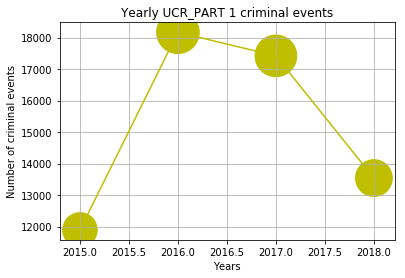

In [125]:
df_UCR_PART1 = df[df["UCR_PART"] == 1]

#according to individual year
df_1 = df_UCR_PART1["INCIDENT_NUMBER"].groupby(df_UCR_PART1["YEAR"])
print(df_1.count())

years = list(dict(df_1.count()).keys())
counts1 = list(dict(df_1.count()).values())
s = [int(x/10) for x in counts1]
plt.scatter(years, counts1, s=s, alpha=1, c="y")
plt.grid(which="both")
plt.xlabel("Years")
plt.ylabel("Number of criminal events")
plt.title("Yearly UCR_PART 1 criminal events")
plt.plot(years, counts1, c="y")
plt.gcf()
plt.savefig("./insights/part1_yearly.png")
plt.show()

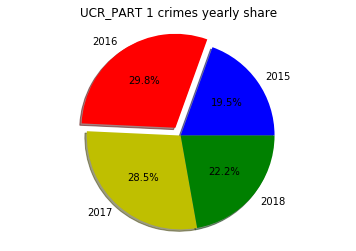

In [153]:
total1 = 0
for x in counts1:
    total1 += x
explode = [0, 0.1, 0 ,0]
plt.pie(counts1 / total1, labels=["2015", "2016", "2017", "2018"], colors=["b", 'r', 'y', 'g'], shadow= True,
        autopct="%1.1f%%", explode=explode)
plt.axis("equal")
plt.title("UCR_PART 1 crimes yearly share")
plt.gcf()
plt.savefig("./insights/share_part1_yearly.png")
plt.show()

above figure clearly depicts the share UCR_PART 1 crimes distributed according to years. clearly among all the part 1 crimes in boston in four year 2016 has maximum share.

YEAR
2015    16996
2016    28341
2017    27205
2018    21706
Name: INCIDENT_NUMBER, dtype: int64


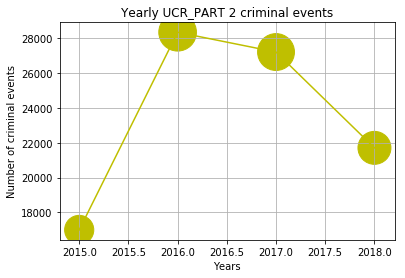

In [126]:
df_UCR_PART2 = df[df["UCR_PART"] == 2]

#according to individual year
df_2 = df_UCR_PART2["INCIDENT_NUMBER"].groupby(df_UCR_PART2["YEAR"])
print(df_2.count())

years = list(dict(df_2.count()).keys())
counts2 = list(dict(df_2.count()).values())
s = [int(x/20) for x in counts2]
plt.scatter(years, counts2, s=s, alpha=1, c="y")
plt.grid(which="both")
plt.xlabel("Years")
plt.ylabel("Number of criminal events")
plt.title("Yearly UCR_PART 2 criminal events")
plt.plot(years, counts2, c="y")
plt.gcf()
plt.savefig("./insights/part2_yearly.png")
plt.show()

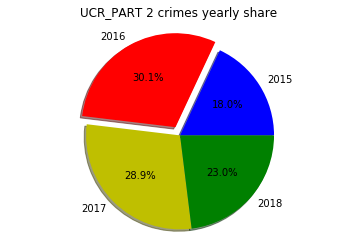

In [154]:
total2 = 0
for x in counts2:
    total2 += x
explode = [0, 0.1, 0 ,0]
plt.pie(counts2 / total2, labels=["2015", "2016", "2017", "2018"], colors=["b", 'r', 'y', 'g'], shadow= True,
        autopct="%1.1f%%", explode=explode)
plt.axis("equal")
plt.title("UCR_PART 2 crimes yearly share")
plt.gcf()
plt.savefig("./insights/share_part2_yearly.png")
plt.show()

Here also we can see that 2016 leads the table among all the years for maximum share in violent crimes.

YEAR
2015    22221
2016    44675
2017    48112
2018    37199
Name: INCIDENT_NUMBER, dtype: int64


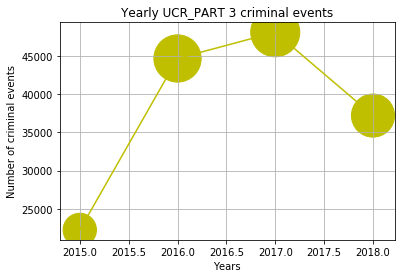

In [127]:
df_UCR_PART3 = df[df["UCR_PART"] == 3]

#according to individual year
df_3 = df_UCR_PART3["INCIDENT_NUMBER"].groupby(df_UCR_PART3["YEAR"])
print(df_3.count())

years = list(dict(df_3.count()).keys())
counts3 = list(dict(df_3.count()).values())
s = [int(x/20) for x in counts3]
plt.scatter(years, counts3, s=s, alpha=1, c="y")
plt.grid(which="both")
plt.xlabel("Years")
plt.ylabel("Number of criminal events")
plt.title("Yearly UCR_PART 3 criminal events")
plt.plot(years, counts3, c="y")
plt.gcf()
plt.savefig("./insights/part3_yearly.png")
plt.show()

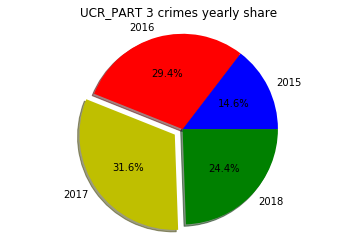

In [155]:
total3 = 0
for x in counts3:
    total3 += x
explode = [0, 0, 0.1 ,0]
plt.pie(counts3 / total3, labels=["2015", "2016", "2017", "2018"], colors=["b", 'r', 'y', 'g'], shadow= True,
        autopct="%1.1f%%", explode=explode)
plt.axis("equal")
plt.title("UCR_PART 3 crimes yearly share")
plt.gcf()
plt.savefig("./insights/share_part3_yearly.png")
plt.show()

Here in our PART_3 crimes tables year 2017 leads the table. A more detailed insight into the data reveals that ..

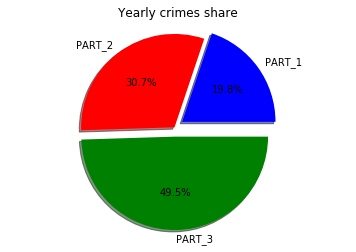

In [166]:
counts = np.array(counts1) + np.array(counts2) + np.array(counts3)

total = 0
for x in counts:
    total += x

data = [total1, total2, total3]
explode = [0.1, 0, 0.1]
plt.pie(data/ total, labels=["PART_1", "PART_2", "PART_3"], colors=["b", 'r', 'g'], shadow= True,
        autopct="%1.1f%%", explode=explode)
plt.axis("equal")
plt.title("Yearly crimes share")
plt.gcf()
plt.savefig("./insights/share_part3_yearly.png")
plt.show()

As we can clearly see part2 crimes sum up to 30.7 percent of total crimes in boston. This is still a huge number keeping in mind the extent to which these crimes can go.

Now let's look at some individual insights for year 2015. Our main focus here will be on PART_2 Codes which is considered as most violent and dangerous.

In [171]:
df2 = df[df["UCR_PART"] == 2]
df2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
3,I182084640,1846,Drug Violation,DRUGS - POSS CLASS E,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"
4,I182084640,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,D4,171,0,2018-10-19 16:50:00,2018,10,5,16,2,HARRISON AVE,"(42.33511904, -71.07491710)"
8,I182084628,2905,Violations,VAL - OPERATING WITHOUT LICENSE,B2,261,0,2018-10-19 19:50:00,2018,10,5,19,2,DUDLEY ST,"(42.32046979, -71.07161950)"
9,I182084628,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B2,261,0,2018-10-19 19:50:00,2018,10,5,19,2,DUDLEY ST,"(42.32046979, -71.07161950)"
11,I182084627,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,317,0,2018-10-19 18:51:00,2018,10,5,18,2,HUMBOLDT AVE,"(42.31262432, -71.08991596)"


In [173]:
df2_2015 = df[df["YEAR"] == 2015]
df2_2015.head()



,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
3243,I182081063,1107,Fraud,FRAUD - IMPERSONATION,E18,478,0,2015-12-01 12:25:00,2015,12,2,12,2,RUSKINDALE RD,"(42.26889666, -71.10813750)"
9763,I182074094,2629,Harassment,HARASSMENT,B2,258,0,2015-09-14 09:31:00,2015,9,1,9,2,COLUMBIA RD,"(42.31514179, -71.06704709)"
17169,I182066132,2629,Harassment,HARASSMENT,B3,455,0,2015-07-31 23:27:00,2015,7,5,23,2,RADCLIFFE ST,"(42.30020194, -71.07835353)"
27613,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,0,2015-07-12 15:37:00,2015,7,0,15,2,FAYSTON ST,"(42.31224327, -71.07549901)"
27614,I182054888,2670,Criminal Harassment,CRIMINAL HARASSMENT,B2,326,0,2015-07-12 15:37:00,2015,7,0,15,2,FAYSTON ST,"(42.31224327, -71.07549901)"
